1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from math import ceil

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [352]:
stud.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
279,GP,M,18,U,LE3,T,4.0,3.0,teacher,services,course,NaN,2.0,1.0,0.0,no,NaN,NaN,yes,yes,-3.0,yes,yes,no,4.0,2.0,3.0,1.0,8.0,50.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,-3.0,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
194,GP,M,16,U,GT3,T,2.0,3.0,other,other,home,father,2.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,NaN,NaN,5.0,3.0,3.0,3.0,0.0,70.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
317,GP,F,18,U,GT3,T,4.0,3.0,other,other,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,NaN,3.0,4.0,5.0,9.0,45.0


# списки

In [353]:
list_bi = list('school sex address famsize Pstatus schoolsup famsup paid activities nursery higher internet romantic'
               .split()) # лист с двумя вариантами ответа
four = list('reason traveltime studytime'.split()) # список с 4 вариантами ответа
five = list('Medu Fedu Mjob Fjob failures famrel freetime goout health'.split()) # список с 5 вариантами ответа 
nomin = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
         'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
categ = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'romantic', 'famrel', 'freetime',
         'goout', 'health']

In [354]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Функции

In [355]:
def foundmistakes(columns, size):
    # используется для поиска опечаток НЕ в количественных признаках
    # size это количество стандартных вариантов ответа + 1 ( для None)
    # вызвращает столбцы с опечатками, если они есть
    mistakes = 0
    for col in columns:
        stud.loc[:,col] = stud.loc[:,col].astype(str).apply(lambda x : None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip()) # преобразование пропусков к None
        
        if stud.loc[:, col].nunique() > size:
            mistakes += 1
            print('Найденно необычное распределение в колонке ', col)
    print('Количество необычный распределений = ', mistakes) 
    
    
def difference(col):
    # сравнение среднего значения score для каждого элемента столбца
    cols = stud.loc[:, col].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, col] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, col] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', col)
            break
            

def get_boxplot(column):
    # возвращает boxplot для колонки
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.boxplot(x=column, y='score', 
                data=stud,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

In [356]:
foundmistakes(list_bi, size=3)

Количество необычный распределений =  0


In [357]:
foundmistakes(four, size=5)

Количество необычный распределений =  0


In [359]:
foundmistakes(five, size=6)
# надо дважды запустить эту строку, пока что не могу найти ошибку

Найденно необычное распределение в колонке  Fedu
Найденно необычное распределение в колонке  famrel
Количество необычный распределений =  2


# Fedu and famrel

In [360]:
display(stud.Fedu.unique())
display(stud.famrel.unique())

array(['4.0', '1.0', '2.0', '3.0', '40.0', 'None', '0.0'], dtype=object)

array(['4.0', '5.0', '3.0', 'None', '-1.0', '2.0', '1.0'], dtype=object)

In [361]:
stud.Fedu = stud.Fedu.apply(lambda x: float(x) if x != 'None' else x)
stud.famrel = stud.Fedu.apply(lambda x: float(x) if x != 'None' else x)

In [362]:
stud = stud.query('Fedu in [0, 1, 2, 3, 4, "None"]')
stud = stud.query('famrel in [1, 2, 3, 4, 5, "None"]')
stud.shape

(392, 30)

# absences

count    380.000000
mean       7.300000
std       23.555683
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

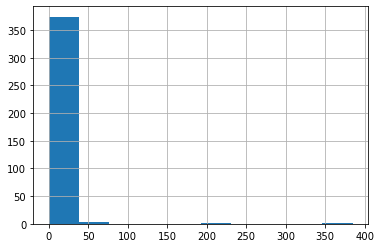

In [363]:
display(stud.absences.hist())
stud.absences.describe()

Точно нельзя сказать выброс ли элемент со значением 385 и около 200 (надо знать сколько часов выделяется на эту дисциплину), но т.к. таких элементов мало, я буду считать что это выброс

(-0.076, 7.5]    275
(7.5, 15.0]       70
(15.0, 22.5]      22
(22.5, 30.0]       6
(52.5, 60.0]       2
(37.5, 45.0]       2
(67.5, 75.0]       1
(60.0, 67.5]       0
(45.0, 52.5]       0
(30.0, 37.5]       0
Name: absences, dtype: int64

count    378.000000
mean       5.759259
std        8.117031
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

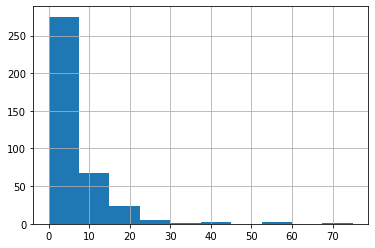

In [364]:
stud = stud.loc[stud.loc[:,'absences'] < 100]
stud.absences= stud.absences.apply(lambda x: ceil(stud.absences.mean()) if pd.isnull(x) else x) # преобразование 0 к mean
stud.absences.hist(bins=10)
display(stud.absences.value_counts(bins=10))
stud.absences.describe()

Т.к. много учеников крайне мало пропускают школу больше 8 раз, можно это обозначить как 0, а более 8 раз это 1

In [365]:
stud.absences = stud.loc[:, 'absences'].apply(lambda x: 0 if x<8
                                              else 1 if x>8
                                              else None)
nomin.append('absences') # добавление колонки absences к номинативным признакам

# studytime, granular

count    373.000000
mean      -6.104558
std        2.529887
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

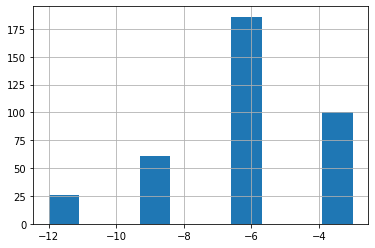

In [366]:
display(stud.loc[:, 'studytime, granular'].hist())
display(stud.loc[:, 'studytime, granular'].describe())

In [367]:
stud.loc[:, ['studytime','studytime, granular']].sample(10)

,studytime,"studytime, granular"
89,2.0,-6.0
13,2.0,-6.0
225,2.0,-6.0
199,2.0,-6.0
231,2.0,-6.0
279,1.0,-3.0
155,2.0,-6.0
107,3.0,-9.0
28,2.0,-6.0
9,2.0,-6.0


In [368]:
stud.loc[:, ['studytime','studytime, granular']].corr()

,"studytime, granular"
"studytime, granular",1.0


In [369]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) # признак не несет никакой смысловой нагрузки

# age

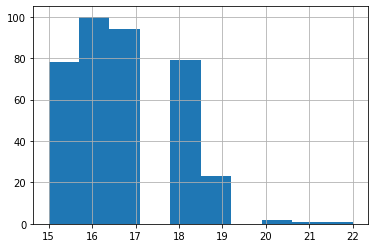

In [370]:
display(stud['age'].hist())

Выбросок не видно, пропусков тоже нет

# guardian

In [371]:
stud.guardian = stud.loc[:,'guardian'].astype(str).apply(lambda x : None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
stud.guardian.value_counts()

mother    238
father     83
other      27
Name: guardian, dtype: int64

# score

count    373.000000
mean      51.876676
std       22.838630
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

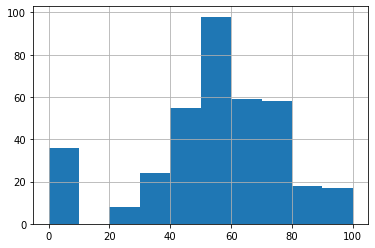

In [372]:
display(stud.loc[:, 'score'].hist())
display(stud.loc[:, 'score'].describe())

Заметна непонятная группа с нулями, надо выяснить откуда они. Распределение похоже на нормальное

In [373]:
stud[stud.loc[:,'score'] == 0].head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,None,T,2.0,2,None,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,2,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,None,1.0,1,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,1,None,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4,at_home,teacher,course,mother,None,2.0,0.0,no,yes,no,no,yes,yes,no,yes,4,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4,services,None,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4,at_home,other,course,mother,3.0,2.0,0.0,no,no,None,no,yes,yes,no,no,4,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,None,other,other,None,other,None,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,None,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3,teacher,services,None,father,2.0,4.0,0.0,yes,yes,no,None,yes,yes,yes,no,3,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1,other,other,home,None,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,1,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2,health,services,home,father,1.0,2.0,3.0,no,None,no,no,yes,yes,yes,no,2,3.0,2.0,3.0,0.0,0.0


Можно заметить, что там где оценка равна нулю, количество пропусков так же равно 0. Я думаю, что эти студенты были переведены или были отчислены во время учебного года

In [374]:
stud = stud[~stud['score'].isnull()] # исключение пропусков в score
stud = stud[stud['score'] != 0] # исключение результатов score = 0


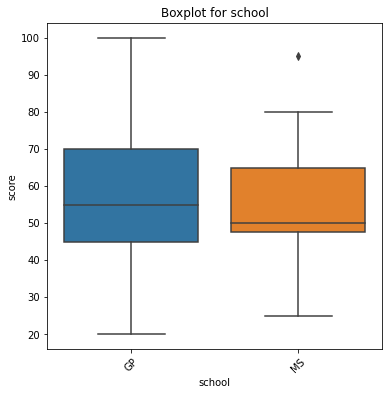

None

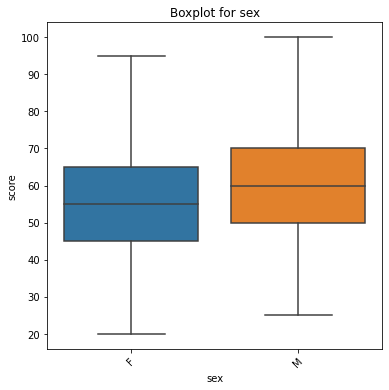

None

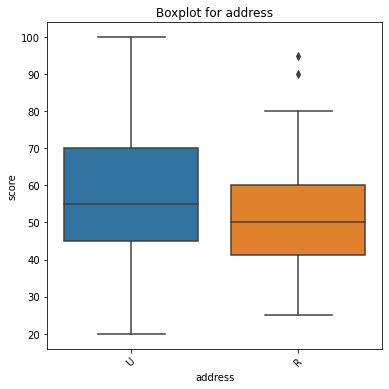

None

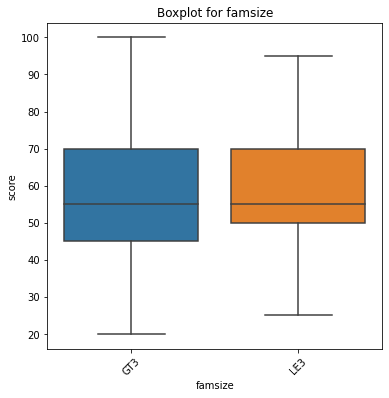

None

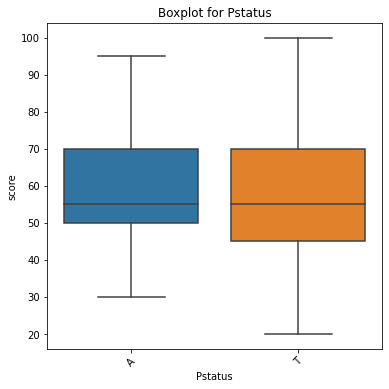

None

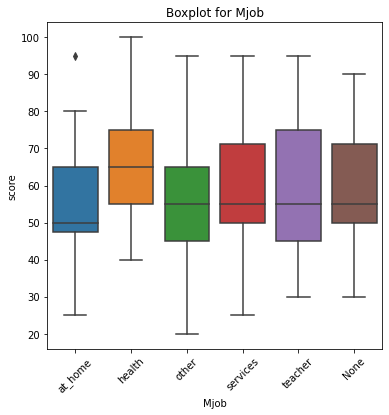

None

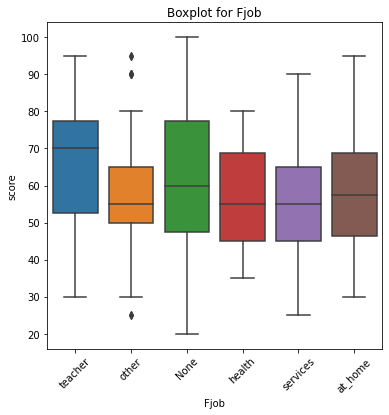

None

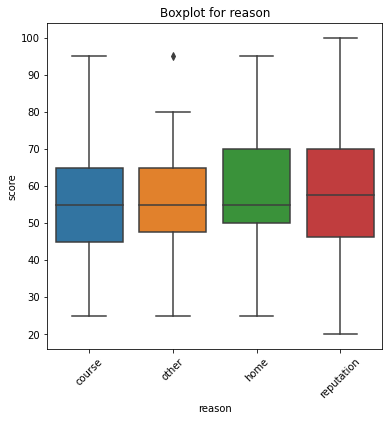

None

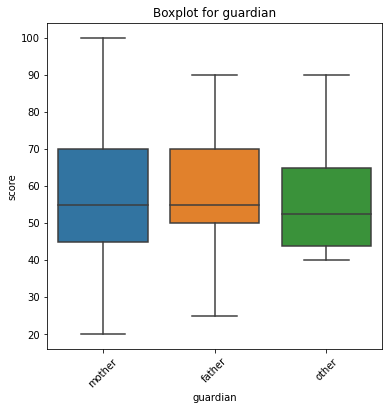

None

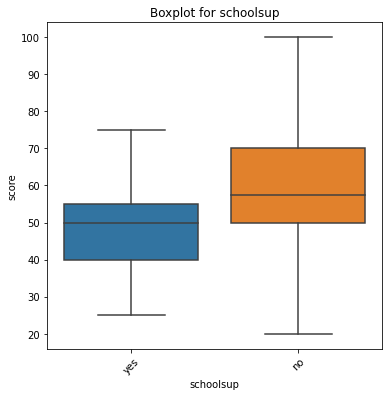

None

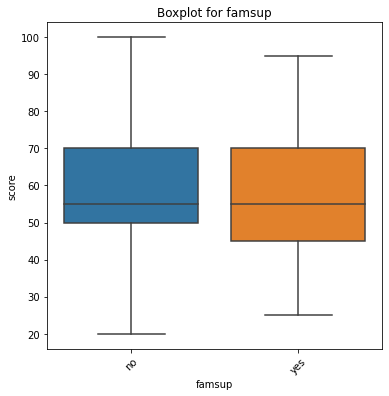

None

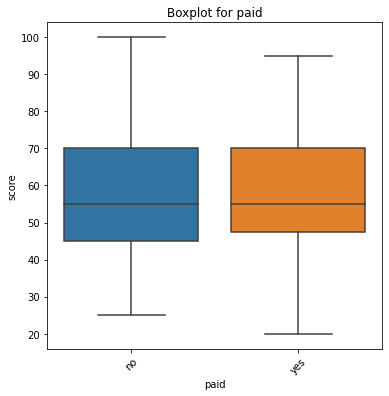

None

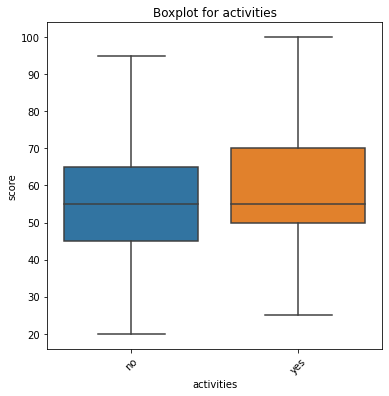

None

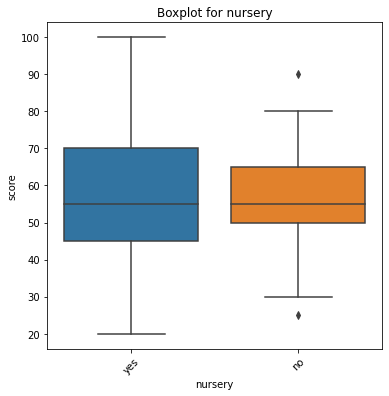

None

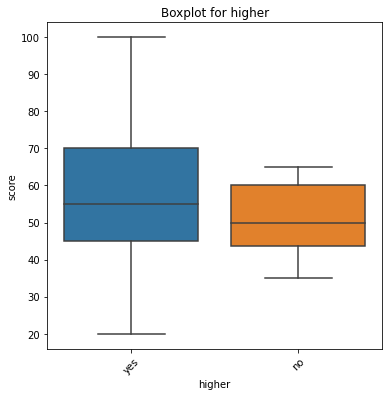

None

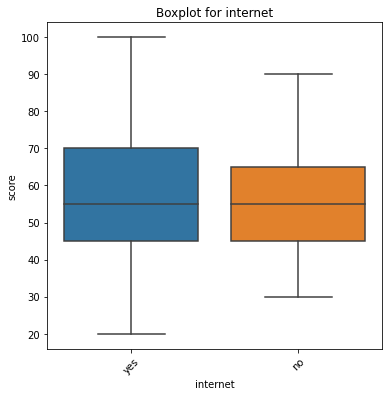

None

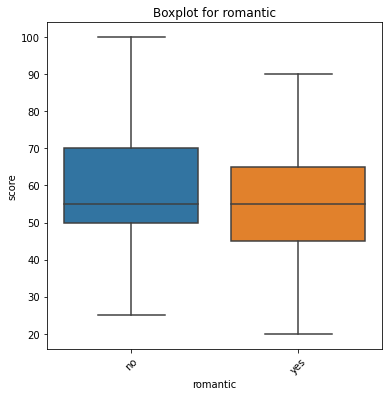

None

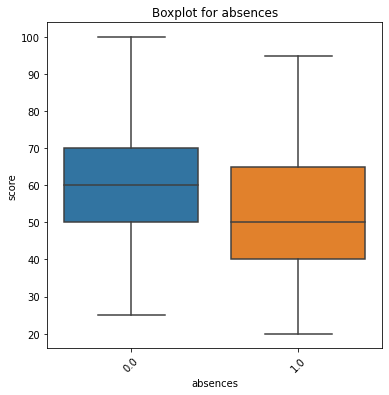

None

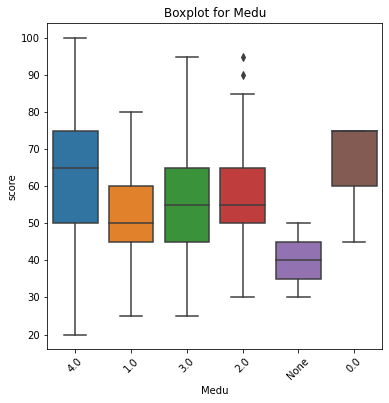

None

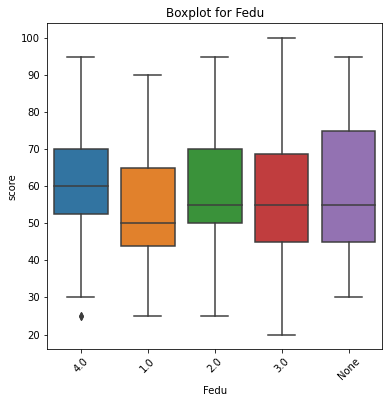

None

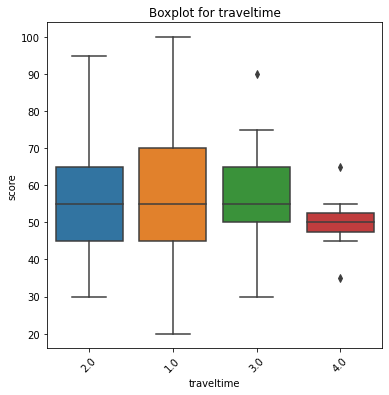

None

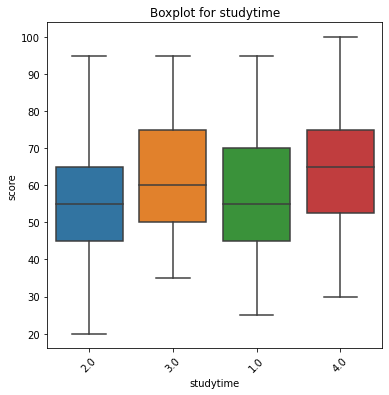

None

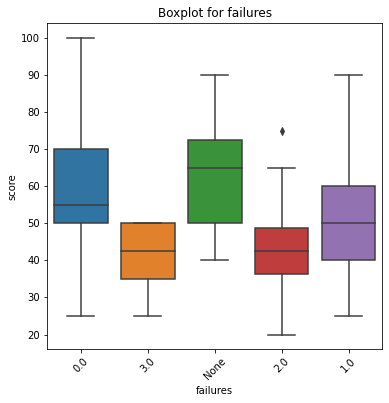

None

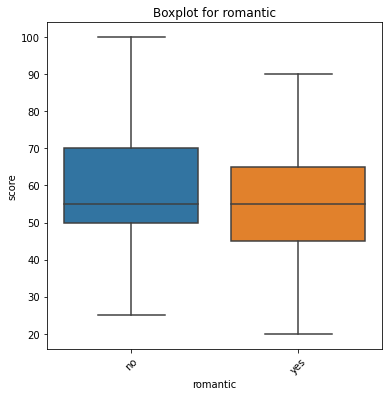

None

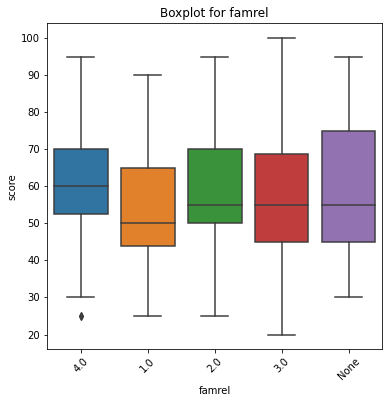

None

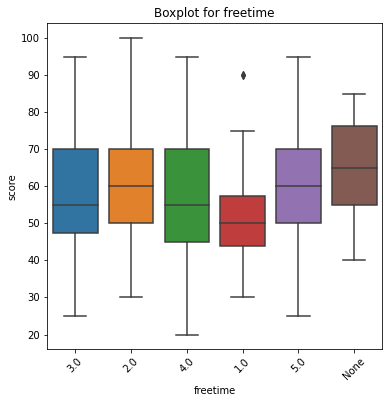

None

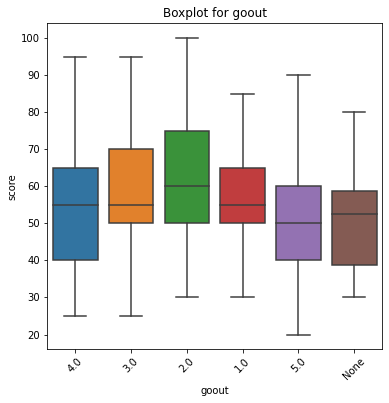

None

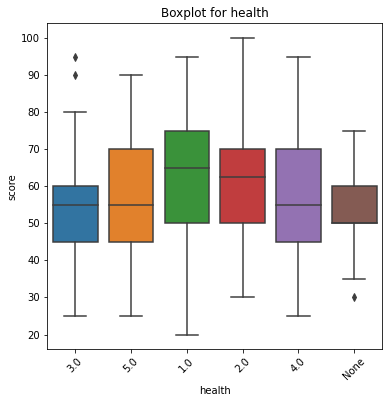

None

In [375]:
for col in nomin + categ:
    display(get_boxplot(col))

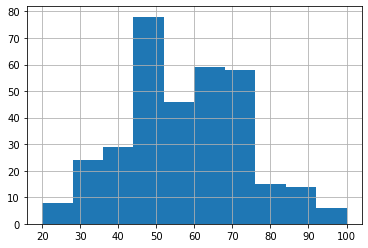

In [376]:
stud['score'].hist()

# поиск статистически значимых различий для каждого столбца с помощью t-test

In [377]:
for cols in (categ + nomin):
    difference(cols)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки absences


# коэффициент корреляции

In [378]:
stud.corr()

,age,absences,score
age,1.000000,0.230535,-0.126546
absences,0.230535,1.000000,-0.204673
score,-0.126546,-0.204673,1.000000


Отсюда ничего выделить не могу

# создание финального DataFrame

In [382]:
final_columns = ['Medu', 'studytime', 'failures', 'goout', 'address', 'Mjob', 'schoolsup', 'absences', 'age', 'score']
stud = stud.loc[:,final_columns]
stud

,Medu,studytime,failures,goout,address,Mjob,schoolsup,absences,age,score
0,4.0,2.0,0.0,4.0,U,at_home,yes,6.0,18,30.0
1,1.0,2.0,0.0,3.0,U,at_home,no,4.0,17,30.0
2,1.0,2.0,3.0,2.0,U,at_home,yes,10.0,15,50.0
3,4.0,3.0,0.0,2.0,U,health,no,2.0,15,75.0
4,3.0,2.0,0.0,2.0,U,other,no,4.0,16,50.0
...,...,...,...,...,...,...,...,...,...,...
390,2.0,2.0,2.0,4.0,U,services,no,212.0,20,45.0
391,3.0,1.0,0.0,5.0,U,services,no,3.0,17,80.0
392,1.0,1.0,3.0,3.0,R,other,NaN,3.0,21,35.0
393,3.0,1.0,0.0,1.0,R,services,no,0.0,18,50.0
